In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return res
def moving_average(x, w=10):
    return np.convolve(x, np.ones(w), 'valid') / w

# Load generated graphs - Temporal Extension

In [3]:
def load_train_graph_extension():
    data_in = cs.load_data("../Generated_graphs/Extension_and_Expantion/InVS13_extension/InVS13_1week.dat")
    graphs_in = cs.build_graphs(data_in,gap=299)
    return graphs_in

def load_original_graph_extension():
    data_in = cs.load_data("../Datasets/InVS13.dat")
    graphs_in = cs.build_graphs(data_in,gap=299)
    return graphs_in

def load_ETNgen_graph_extension():
    res = []
    path = "../Generated_graphs/Extension_and_Expantion/InVS13_extension/2weeks/InVS13_2sett_"
    for i in range(10):
        data_in = cs.load_data(path+str(i)+".dat")
        graphs_in = cs.build_graphs(data_in,gap=299)
        res.append(graphs_in)
    return res

def compute_avg_std_nb_inter(graphs):
    nb_int = []
    for i in graphs:
        nb_int.append(nb_interactions(i)[:3275])

    mean_nb_int = np.mean(nb_int,axis=0)
    std_nb_int = np.std(nb_int,axis=0)
    return mean_nb_int,std_nb_int


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def plot_temporal_extension(axes,train_graph,mean_nb_int,std_nb_int,orig_graph):

    orig_int = moving_average(nb_interactions(train_graph))
    orig_int_long = moving_average(nb_interactions(orig_graph))
    
    m = moving_average(mean_nb_int)
    s = moving_average(std_nb_int)
    x = range(len(moving_average(mean_nb_int)))
    
    axes.plot(orig_int,color=ORIGINAL_COLOR,ls="--",alpha=0.7)
    axes.vlines(2000, -0.5, 8,color=ORIGINAL_COLOR,ls="--",alpha=0.7)
    axes.plot(range(len(orig_int_long))[2000:],orig_int_long[2000:],color=ORIGINAL_COLOR,alpha=0.7)
    axes.plot(moving_average(mean_nb_int),color=ETN_COLOR)

    axes.fill_between(x,m,m-s,color=ETN_COLOR,alpha=0.3)
    axes.fill_between(x,m,m+s,color=ETN_COLOR,alpha=0.3)

    axes.set_title("Temporal extension  (Workplace)")

    axes.tick_params(bottom=False, right=False,left=False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['bottom'].set_visible(False)

    axes.set_ylabel("Number of interactions")
    axes.set_axisbelow(True)
    #axes.yaxis.grid(True, color='#FFFFFF')
    #axes.set_facecolor('#EFEFEF')
    #axes.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    axes.yaxis.grid(True, color='lightgrey')
    axes.xaxis.grid(False)
    

    legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original',alpha=0.7),
                       Line2D([0], [0], color=ORIGINAL_COLOR, lw=3, ls="--", label='Train',alpha=0.7),
                       Line2D([0], [0], color=ETN_COLOR, lw=3,label='ETN-Gen')]
                       #,Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,alpha=0.3,label='ETN-Gen std')]

    # Create the figure
    axes.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

# Temporal extension

In [4]:
ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"




ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR = '#E5865E' # arancio
STM_COLOR = '#95D1D3' # light blue
TAG_COLOR = '#8F2E27' # rosso
DYM_COLOR = '#558B8F' # teal


line_width = 1.5

In [5]:
train_graph = load_train_graph_extension()
temporal_extension = load_ETNgen_graph_extension()

In [6]:
orig_graph = load_original_graph_extension()

In [7]:
mean_nb_int,std_nb_int = compute_avg_std_nb_inter(temporal_extension)

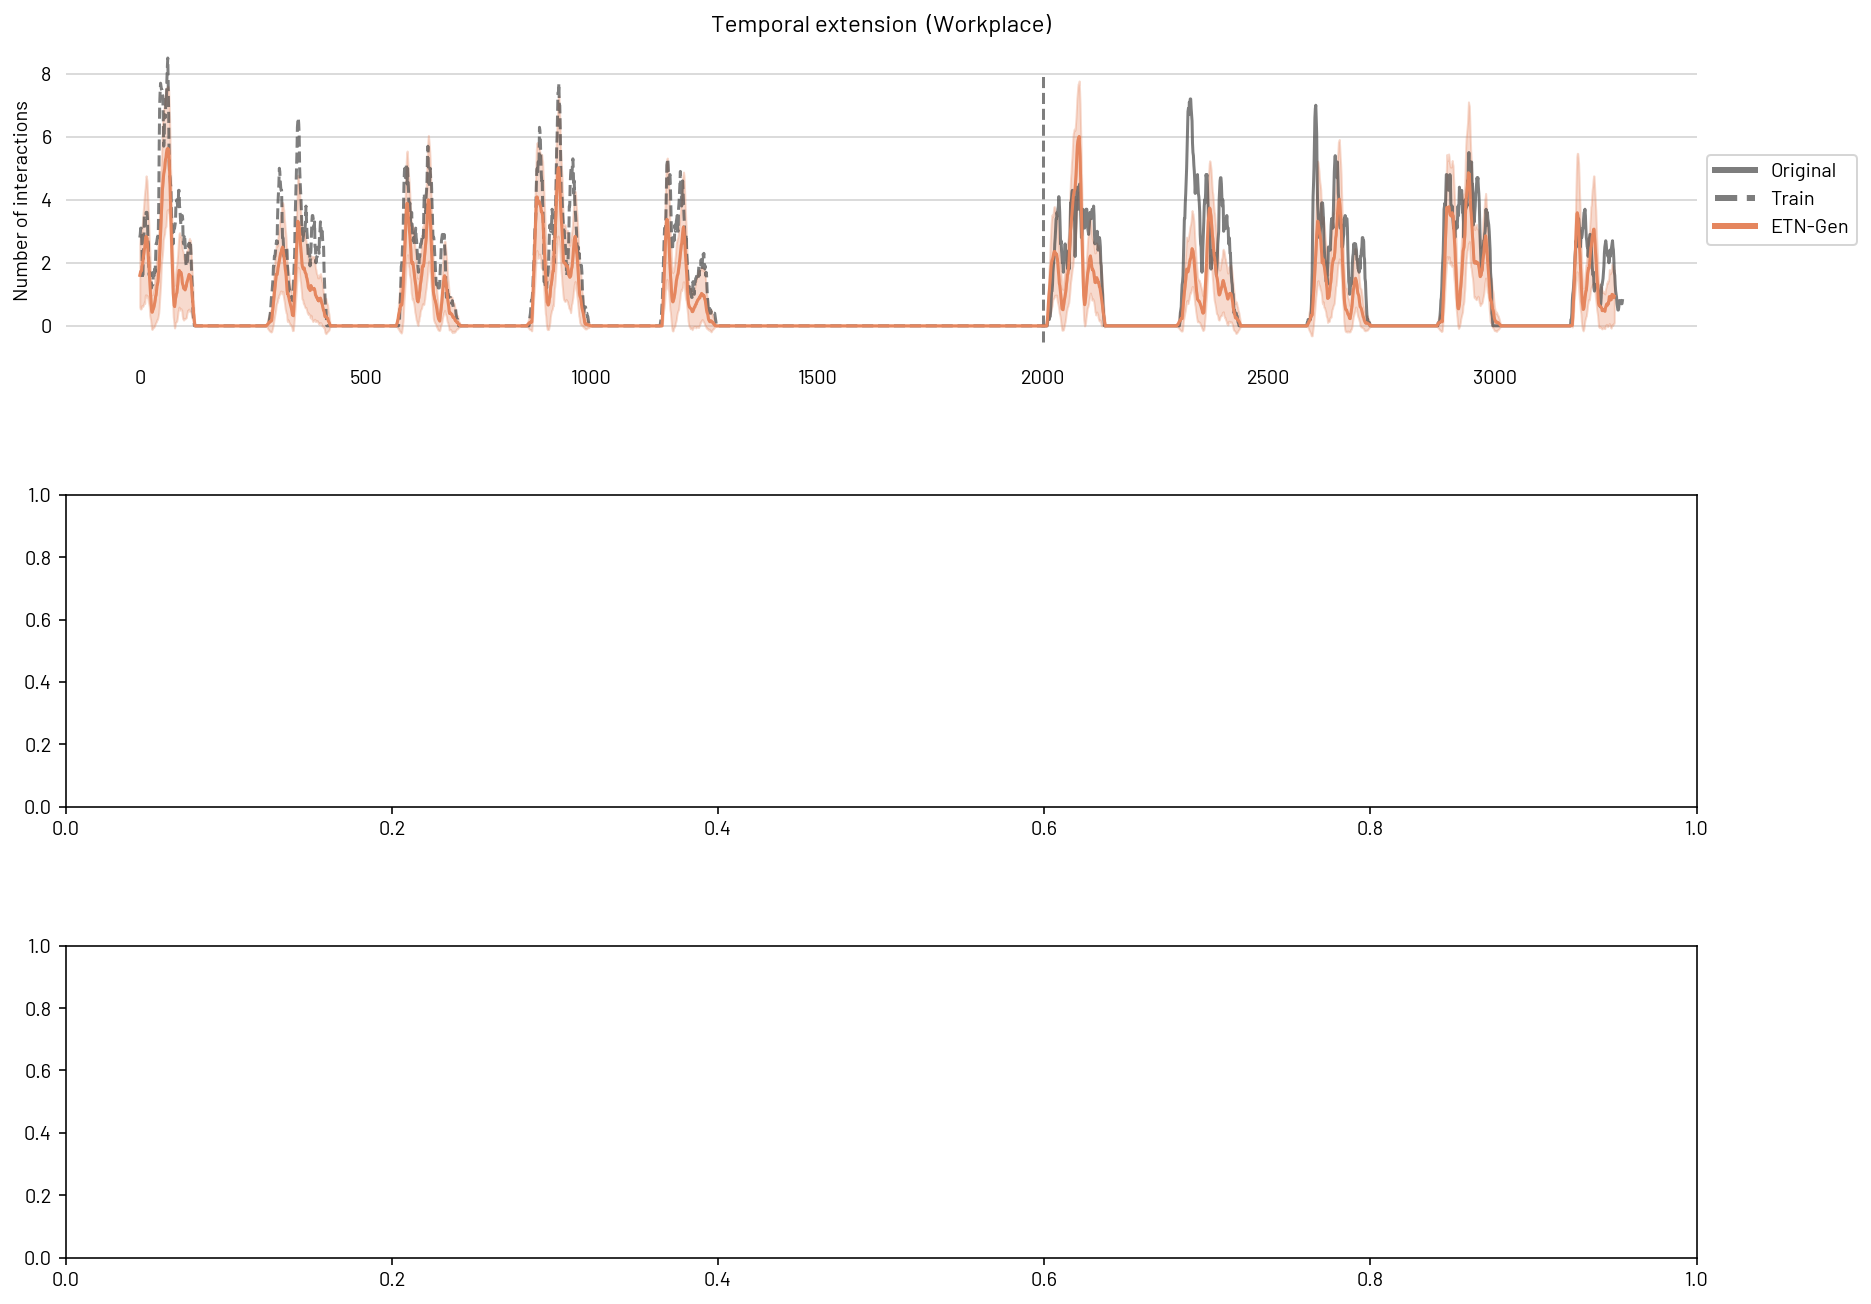

In [8]:
figure, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,9))
figure.tight_layout(h_pad=5,w_pad=1)
plot_temporal_extension(axes[0],train_graph,mean_nb_int,std_nb_int,orig_graph)

# Temporal Expansion

In [33]:
def load_train_graph_expansion():
    data_in = cs.load_data("../Datasets/High_School11.dat")
    graphs_in = cs.build_graphs(data_in,gap=299)
    return graphs_in

def load_ETNgen_graph_expansion(start):
    res = []
    path = "../Generated_graphs/Extension_and_Expantion/High_School11_expansion/High_School11_"+start+"/hs11"
    for i in range(10):
        data_in = cs.load_data(path+str(i)+".dat")
        graphs_in = cs.build_graphs(data_in,gap=299)
        res.append(graphs_in)
    return res

def compute_avg_std_nb_inter_expansion(graphs):
    nb_int = []
    for i in graphs:
        nb_int.append(nb_interactions(i))

    mean_nb_int = np.mean(nb_int,axis=0)
    std_nb_int = np.std(nb_int,axis=0)
    return mean_nb_int,std_nb_int


def plot_one_node_exp(axes, s,ETN_COLOR_X):
    mean_nb_int_exp, std_nb_int_exp = compute_avg_std_nb_inter_expansion(s)
    m = moving_average(mean_nb_int_exp)
    s = moving_average(std_nb_int_exp)
    x = range(len(moving_average(mean_nb_int_exp)))
    axes.plot(moving_average(mean_nb_int_exp),color=ETN_COLOR_X)

    axes.fill_between(x,m,m-s,color=ETN_COLOR_X,alpha=0.2)
    axes.fill_between(x,m,m+s,color=ETN_COLOR_X,alpha=0.2)

def plot_node_exp(axes,train_graph_exp,s_36,s_63,s_88,s_113,train_36,train_88):
    orig_int = moving_average(nb_interactions(train_graph_exp))
    axes.plot(orig_int,color=ORIGINAL_COLOR,alpha=0.7)
    
    
    train_int36 = moving_average(nb_interactions(train_36))
    train_int88 = moving_average(nb_interactions(train_88))
    axes.plot(train_int36,color=ORIGINAL_COLOR,ls="--",alpha=0.7)
    axes.plot(train_int88,color=ORIGINAL_COLOR,ls=":",alpha=0.7)

    plot_one_node_exp(axes, s_36,ETN_COLOR_36)
    #plot_one_node_exp(axes, s_63,ETN_COLOR_63)
    plot_one_node_exp(axes, s_88,ETN_COLOR_88)
    #plot_one_node_exp(axes, s_113,ETN_COLOR_113)

    axes.tick_params(bottom=False, right=False,left=False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['bottom'].set_visible(False)

    axes.set_title("Size expansion  (High school)")
    axes.set_ylabel("Number of interactions")
    axes.set_axisbelow(True)
    #axes.yaxis.grid(True, color='#FFFFFF')
    #axes.set_facecolor('#EFEFEF')
    #axes.xaxis.grid(False)
    
        
    axes.yaxis.grid(True, color='lightgrey')
    axes.xaxis.grid(False)
    
    

    legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original',alpha=0.7),
                       Line2D([0], [0], color=ORIGINAL_COLOR,ls="--", lw=3,label='Train  (30%)',alpha=0.7),
                       Line2D([0], [0], color=ORIGINAL_COLOR,ls=":", lw=3,label='Train  (70%)',alpha=0.7),
                       Line2D([0], [0], color=ETN_COLOR_36, lw=3,label='ETN-Gen  (30%)',alpha=0.7),
                       Line2D([0], [0], color=ETN_COLOR_88, lw=3,label='ETN-Gen  (70%)',alpha=0.7)]
                       #Patch(facecolor=ETN_COLOR_36, edgecolor=ETN_COLOR_36,alpha=0.2,label='ETN-Gen  (30%)'),
                       #Patch(facecolor=ETN_COLOR_88, edgecolor=ETN_COLOR_88,alpha=0.3,label='ETN-Gen  (70%)')]
                       #Patch(facecolor=ETN_COLOR_113, edgecolor=ETN_COLOR_113,alpha=0.3,label='ETN-Gen(90%)')]

    # Create the figure
    axes.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))
    
def load_train_node_exp(file):
    data_in = cs.load_data("../Generated_graphs/Extension_and_Expantion/High_School11_expansion/TRAIN_High_School11_"+file+".dat")
    graphs_in = cs.build_graphs(data_in,gap=299)
    return graphs_in

In [34]:
train_graph_exp = load_train_graph_expansion()
start = ["start36","start63","start88","start113"]

In [35]:
s_36 = load_ETNgen_graph_expansion(start[0])
#s_63 = load_ETNgen_graph_expansion(start[1])
s_88 = load_ETNgen_graph_expansion(start[2])
#s_113 = load_ETNgen_graph_expansion(start[3])

In [36]:
train_36 = load_train_node_exp("36nodes")
train_88 = load_train_node_exp("88nodes")

In [37]:


ETN_COLOR_36 = "#ea9c7b"  
ETN_COLOR_88 = "#b0481c" 


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR = '#E5865E' # arancio

line_width = 1.5

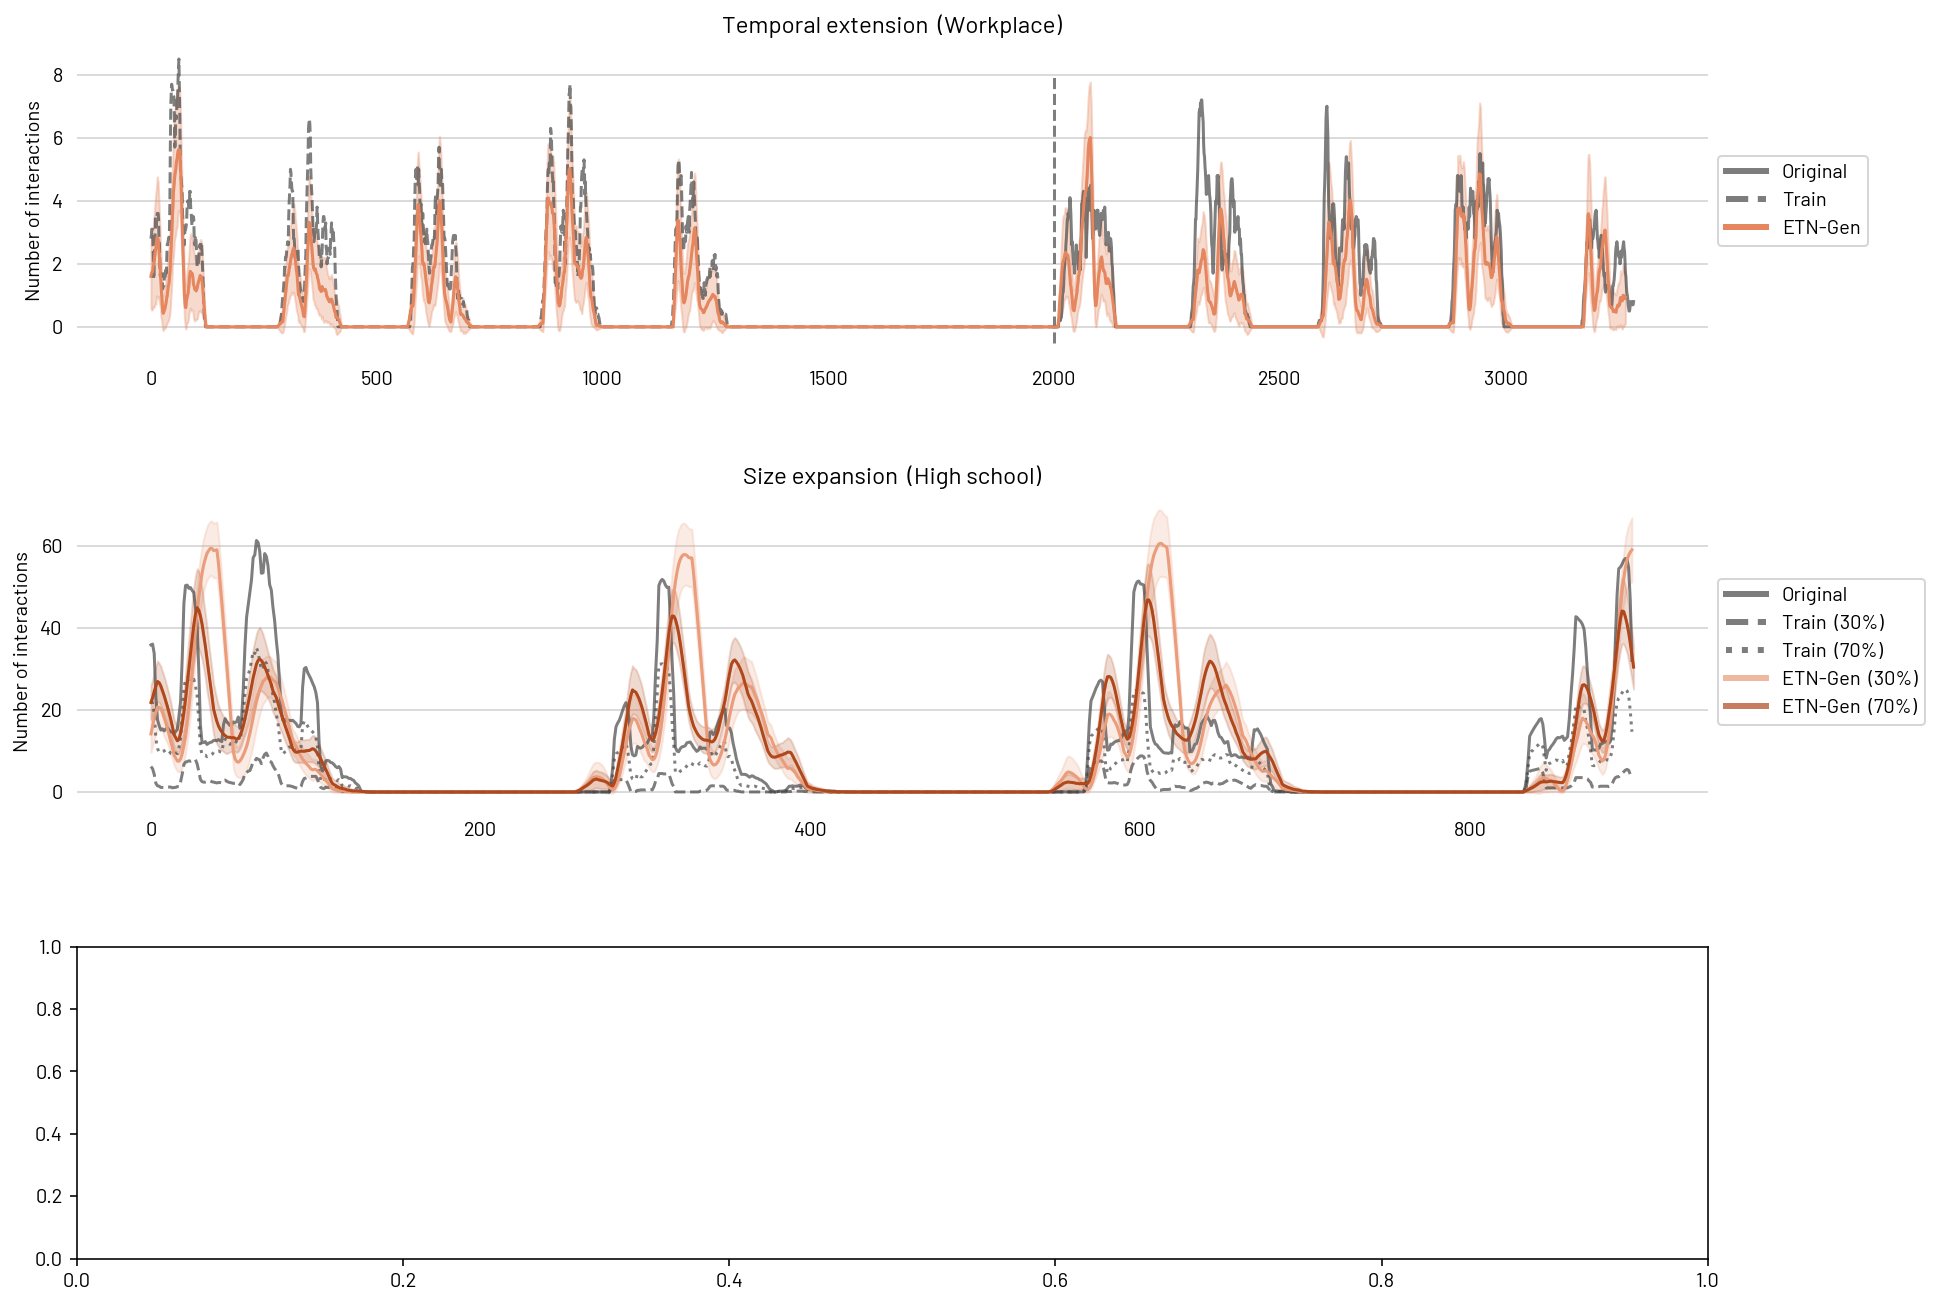

In [38]:
figure, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,9))
figure.tight_layout(h_pad=5,w_pad=1)

plot_temporal_extension(axes[0],train_graph,mean_nb_int,std_nb_int,orig_graph)
plot_node_exp(axes[1],train_graph_exp,s_36,_,s_88,_,train_36,train_88)

# Temporal Expansion and Extensions

In [42]:
def load_train_graph_expansion_extension():
    data_in = cs.load_data("../Generated_graphs/Extension_and_Expantion/High_School_expansion_and_extension_2days/High_School11_63nodes_2day.dat")
    graphs_in = cs.build_graphs(data_in,gap=299)
    return graphs_in

def load_ETNgen_graph_expansion_extension():
    res = []
    path = "../Generated_graphs/Extension_and_Expantion/High_School_expansion_and_extension_2days/hs_"
    for i in range(10):
        data_in = cs.load_data(path+str(i)+".dat")
        graphs_in = cs.build_graphs(data_in,gap=299)
        res.append(graphs_in)
    return res


def compute_avg_std_nb_inter_expansion_ext(graphs):
    nb_int = []
    for i in graphs:
        nb_int.append(nb_interactions(i)[0:903])

    mean_nb_int = np.mean(nb_int,axis=0)
    std_nb_int = np.std(nb_int,axis=0)
    return mean_nb_int,std_nb_int


def plot_exp_ext(axes,train_graph_exp,ori_exp_ext,gen_exp_ext):
    m_nb_int_exp_ext, s_nb_int_exp_ext = compute_avg_std_nb_inter_expansion_ext(gen_exp_ext)
    orig_int = moving_average(nb_interactions(train_graph_exp))
    axes.plot(orig_int,color=ORIGINAL_COLOR,alpha=0.7)

    orig_int = moving_average(nb_interactions(ori_exp_ext))
    m = moving_average(m_nb_int_exp_ext)
    s = moving_average(s_nb_int_exp_ext)

    x = range(len(moving_average(m_nb_int_exp_ext)))
    axes.plot(orig_int,color=ORIGINAL_COLOR,ls="--",alpha=0.7)
    axes.vlines((280*2), -0.5, 50,color=ORIGINAL_COLOR,ls="--",alpha=0.7)
        
    axes.plot(moving_average(m_nb_int_exp_ext),color=ETN_COLOR)

    axes.fill_between(x,m,m-s,color=ETN_COLOR,alpha=0.3)
    axes.fill_between(x,m,m+s,color=ETN_COLOR,alpha=0.3)

    axes.set_title("Temporal extension and size expansion  (High school)")

    axes.tick_params(bottom=False, right=False,left=False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['bottom'].set_visible(False)

    axes.set_ylabel("Number of interactions")
    axes.set_axisbelow(True)
    #axes.yaxis.grid(True, color='#FFFFFF')
    #axes.set_facecolor('#EFEFEF')
    #axes.xaxis.grid(False)
    
    #axes.yaxis.grid(True, color='#FFFFFF')
    #axes.set_facecolor('#EFEFEF')
    #axes.xaxis.grid(False)
    
        
    axes.yaxis.grid(True, color='lightgrey')
    axes.xaxis.grid(False)
    


    legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original',alpha=0.7),
                       Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,ls="--",label='Train',alpha=0.7),
                       Line2D([0], [0], color=ETN_COLOR, lw=3,label='ETN-Gen')]
                        ##,Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,alpha=0.3,label='ETN-Gen std')]

    # Create the figure
    axes.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

In [40]:
ori_exp_ext = load_train_graph_expansion_extension()
gen_exp_ext = load_ETNgen_graph_expansion_extension()

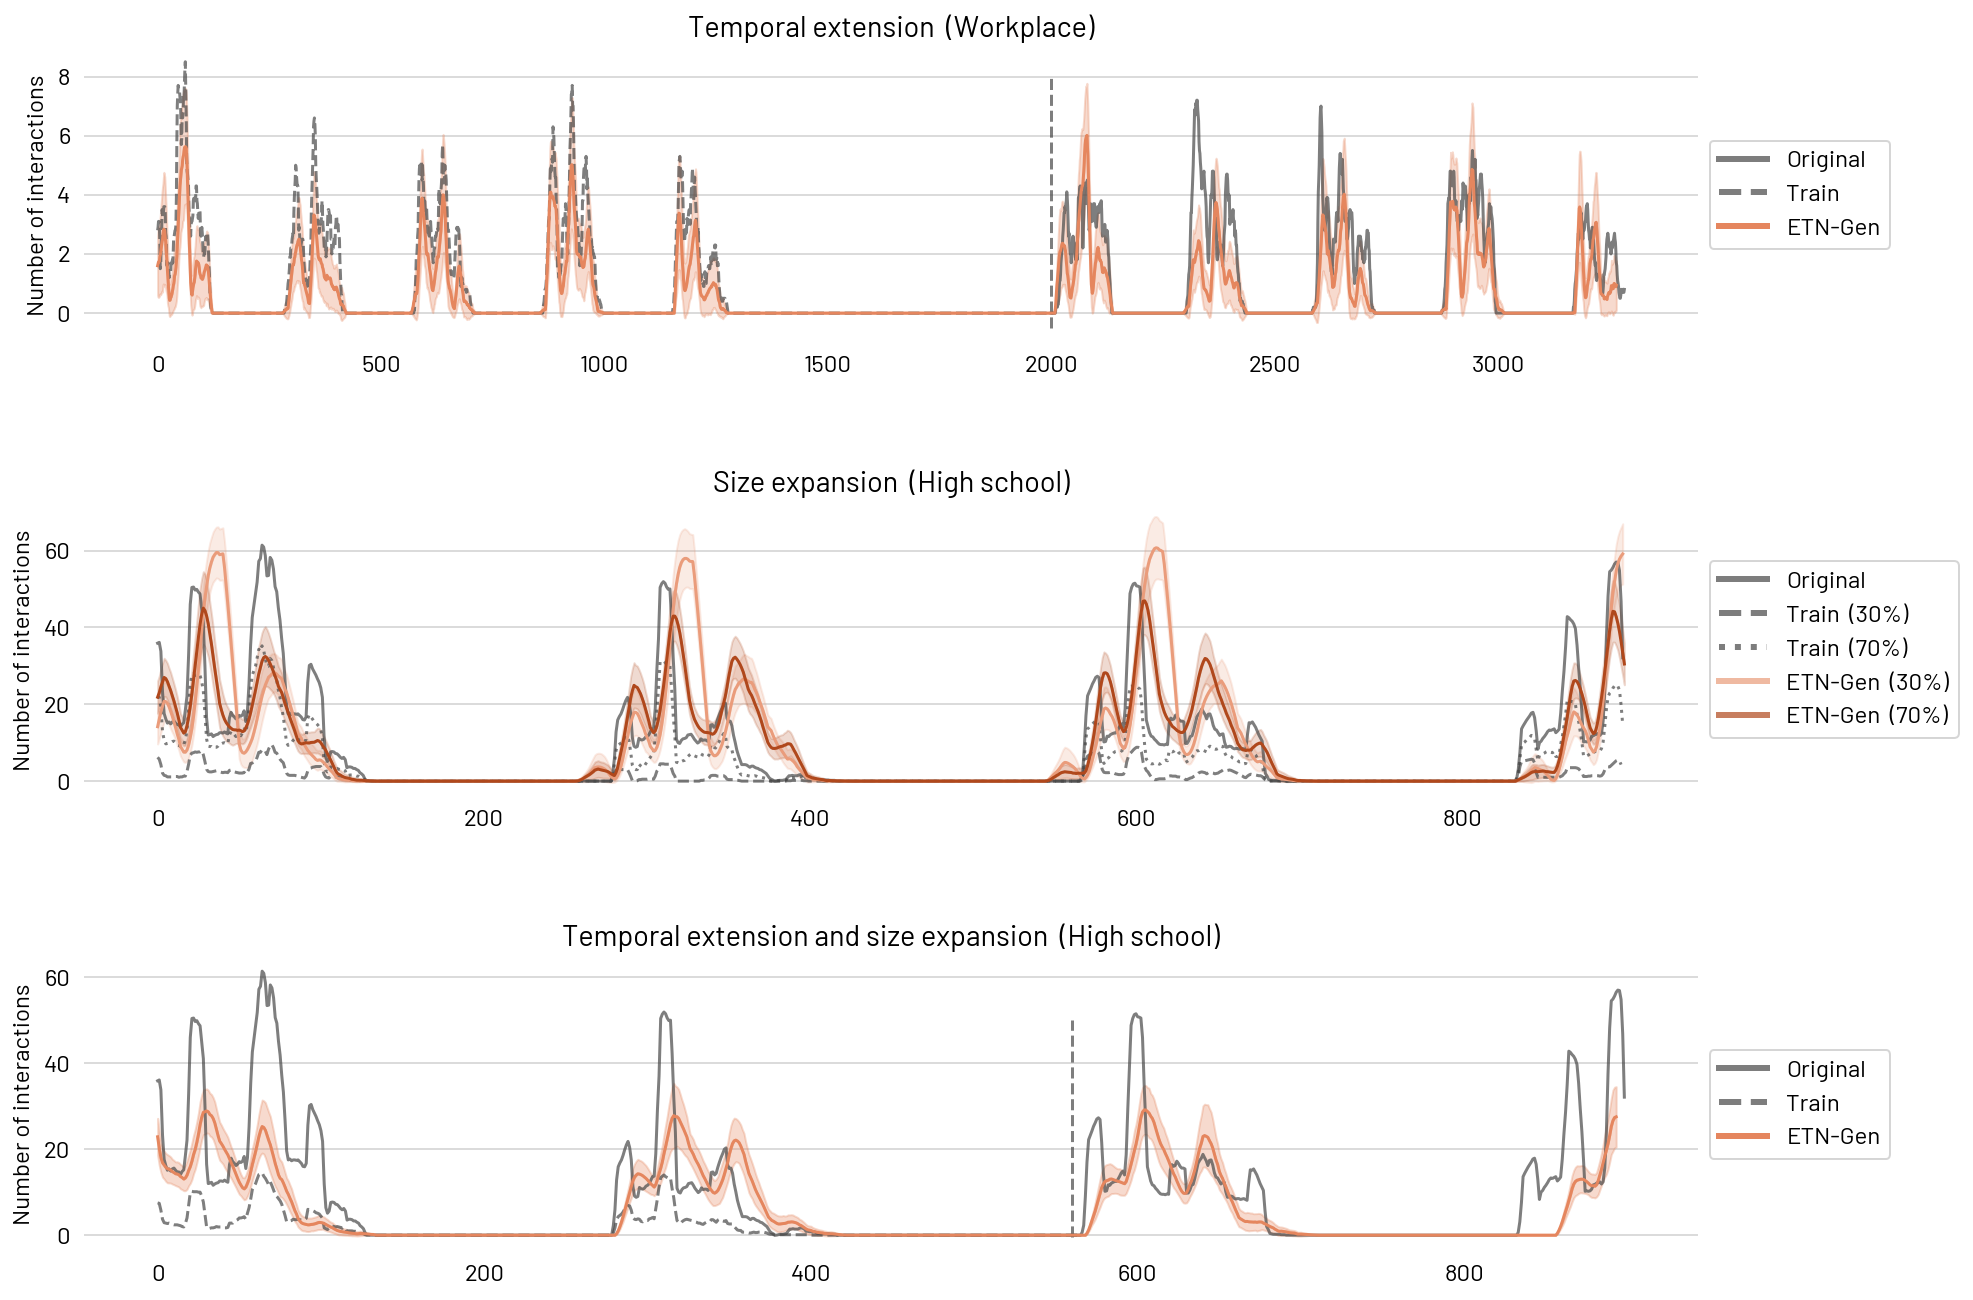

In [45]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
figure, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,9))
figure.tight_layout(h_pad=5,w_pad=1)

plot_temporal_extension(axes[0],train_graph,mean_nb_int,std_nb_int,orig_graph)
plot_node_exp(axes[1],train_graph_exp,s_36,_,s_88,_,train_36,train_88)
plot_exp_ext(axes[2],train_graph_exp,ori_exp_ext,gen_exp_ext)

figure.savefig("Temporal_expansion_extension_V5.pdf", bbox_inches = 'tight')

In [ ]:
orig_int = moving_average(nb_interactions(train_graph))
m = moving_average(mean_nb_int)
s = moving_average(std_nb_int)
x = range(len(moving_average(mean_nb_int)))
axes.plot(orig_int,color=ORIGINAL_COLOR)
axes.plot(moving_average(mean_nb_int),color=ETN_COLOR)

axes.fill_between(x,m,m-s,color=ETN_COLOR,alpha=0.3)
axes.fill_between(x,m,m+s,color=ETN_COLOR,alpha=0.3)


axes.tick_params(bottom=False, right=False,left=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.spines['bottom'].set_visible(False)

axes.set_ylabel("Number of interactions")
axes.set_axisbelow(True)
axes.yaxis.grid(True, color='#FFFFFF')
axes.set_facecolor('#EFEFEF')
axes.xaxis.grid(False)


legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,ls="--",label='Original'),
                   Line2D([0], [0], color=ETN_COLOR, lw=3,label='ETN-Gen mean'),
                   Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,alpha=0.3,label='ETN-Gen std')]

# Create the figure
axes.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))